In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
inpath = %pwd
infile = inpath +'/sunspot_data.csv'
df = pd.read_csv(infile)
df.drop(['Date In Fraction Of Year','Observations','Indicator'],axis=1,inplace=True)
df = df[df['Number of Sunspots'] >= 0]
df['Sunspot Number Error'] = df['Standard Deviation']/np.sqrt(df['Number of Sunspots'])
df.replace([np.inf,-np.inf],0,inplace=True)
df.fillna(0,inplace=True)

In [3]:
df

,Unnamed: 0,Year,Month,Day,Number of Sunspots,Standard Deviation,Sunspot Number Error
7,7,1818,1,8,65,10.2,1.265154
12,12,1818,1,13,37,7.7,1.265872
16,16,1818,1,17,77,11.1,1.264962
17,17,1818,1,18,98,12.6,1.272792
18,18,1818,1,19,105,13.0,1.268670
...,...,...,...,...,...,...,...
73713,73713,2019,10,27,0,0.0,0.000000
73714,73714,2019,10,28,0,0.0,0.000000
73715,73715,2019,10,29,0,0.0,0.000000
73716,73716,2019,10,30,0,0.0,0.000000


In [5]:
df.groupby('Year').sum()

,Unnamed: 0,Month,Day,Number of Sunspots,Standard Deviation,Sunspot Number Error
Year,,,,,,
1818,39473,1414,3350,11276,1843.4,251.881534
1819,138210,1695,3818,9595,1772.7,237.864218
1820,203952,1447,3449,5428,1212.2,156.685652
1821,392887,2130,4724,2791,1038.9,102.353100
1822,580475,2320,5542,2208,1035.7,73.341106
...,...,...,...,...,...,...
2015,26329275,2382,5738,25483,1897.3,220.935872
2016,26535183,2384,5767,14575,1170.8,180.471279
2017,26596090,2382,5738,7935,648.5,119.856366


In [6]:
df.groupby('Year').count()

,Unnamed: 0,Month,Day,Number of Sunspots,Standard Deviation,Sunspot Number Error
Year,,,,,,
1818,213,213,213,213,213,213
1819,249,249,249,249,249,249
1820,224,224,224,224,224,224
1821,304,304,304,304,304,304
1822,353,353,353,353,353,353
...,...,...,...,...,...,...
2015,365,365,365,365,365,365
2016,366,366,366,366,366,366
2017,365,365,365,365,365,365


# Investigate Data Correlations

### Matplotlib

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70471 entries, 7 to 73717
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            70471 non-null  int64  
 1   Year                  70471 non-null  int64  
 2   Month                 70471 non-null  int64  
 3   Day                   70471 non-null  int64  
 4   Number of Sunspots    70471 non-null  int64  
 5   Standard Deviation    70471 non-null  float64
 6   Sunspot Number Error  70471 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 4.3 MB


In [14]:
df

,Unnamed: 0,Year,Month,Day,Number of Sunspots,Standard Deviation,Sunspot Number Error
7,7,1818,1,8,65,10.2,1.265154
12,12,1818,1,13,37,7.7,1.265872
16,16,1818,1,17,77,11.1,1.264962
17,17,1818,1,18,98,12.6,1.272792
18,18,1818,1,19,105,13.0,1.268670
...,...,...,...,...,...,...,...
73713,73713,2019,10,27,0,0.0,0.000000
73714,73714,2019,10,28,0,0.0,0.000000
73715,73715,2019,10,29,0,0.0,0.000000
73716,73716,2019,10,30,0,0.0,0.000000


<IPython.core.display.Javascript object>


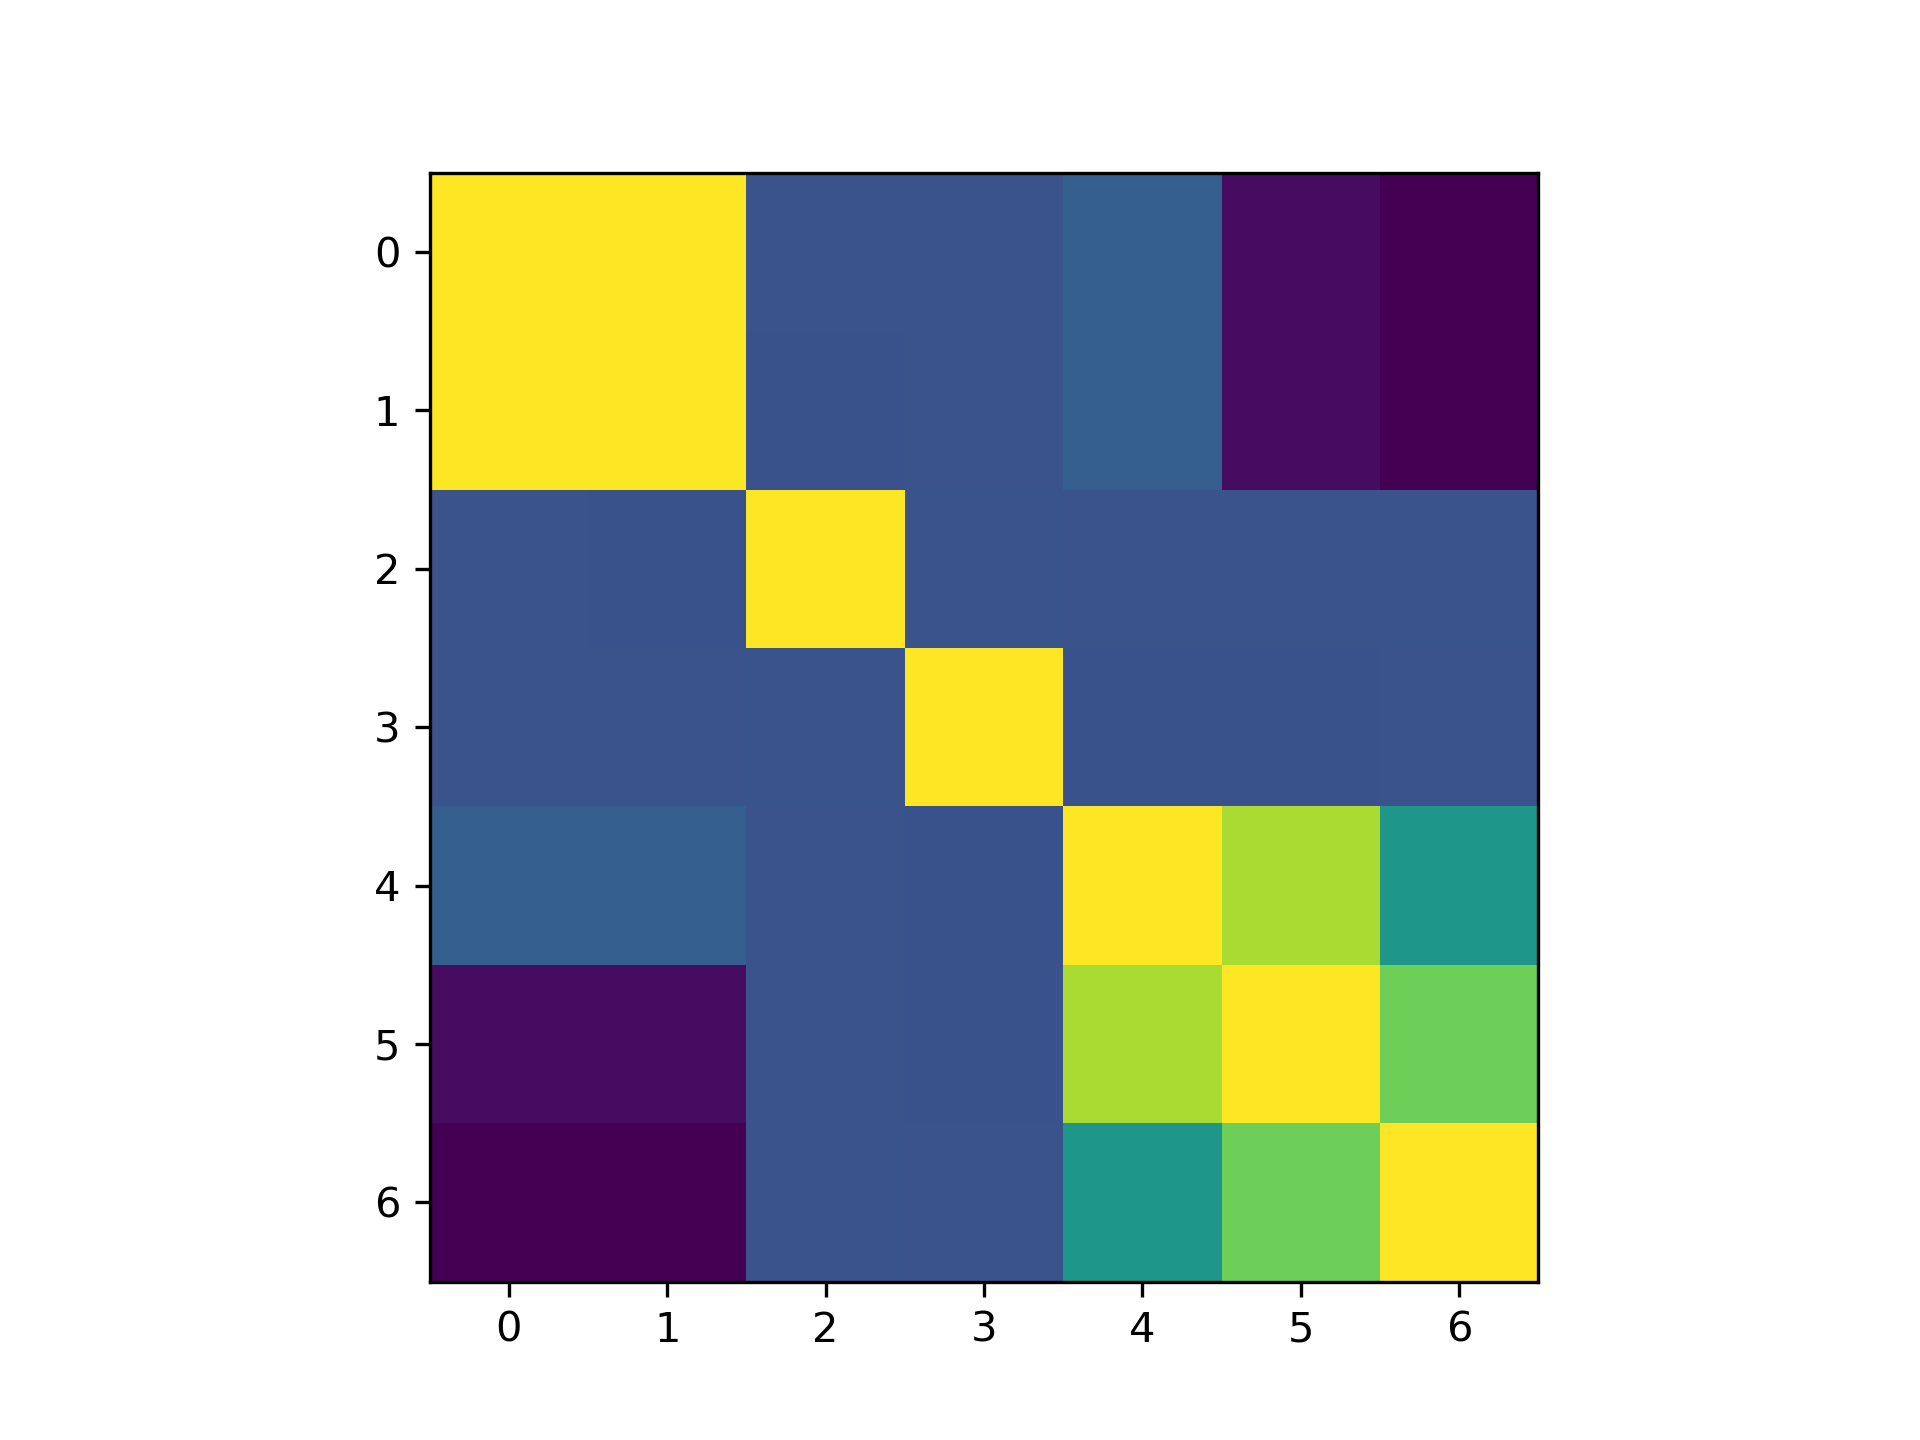

In [9]:
fig = plt.figure()
plt.imshow(df.corr())

### Seaborn (build on Matplotlib)

<IPython.core.display.Javascript object>


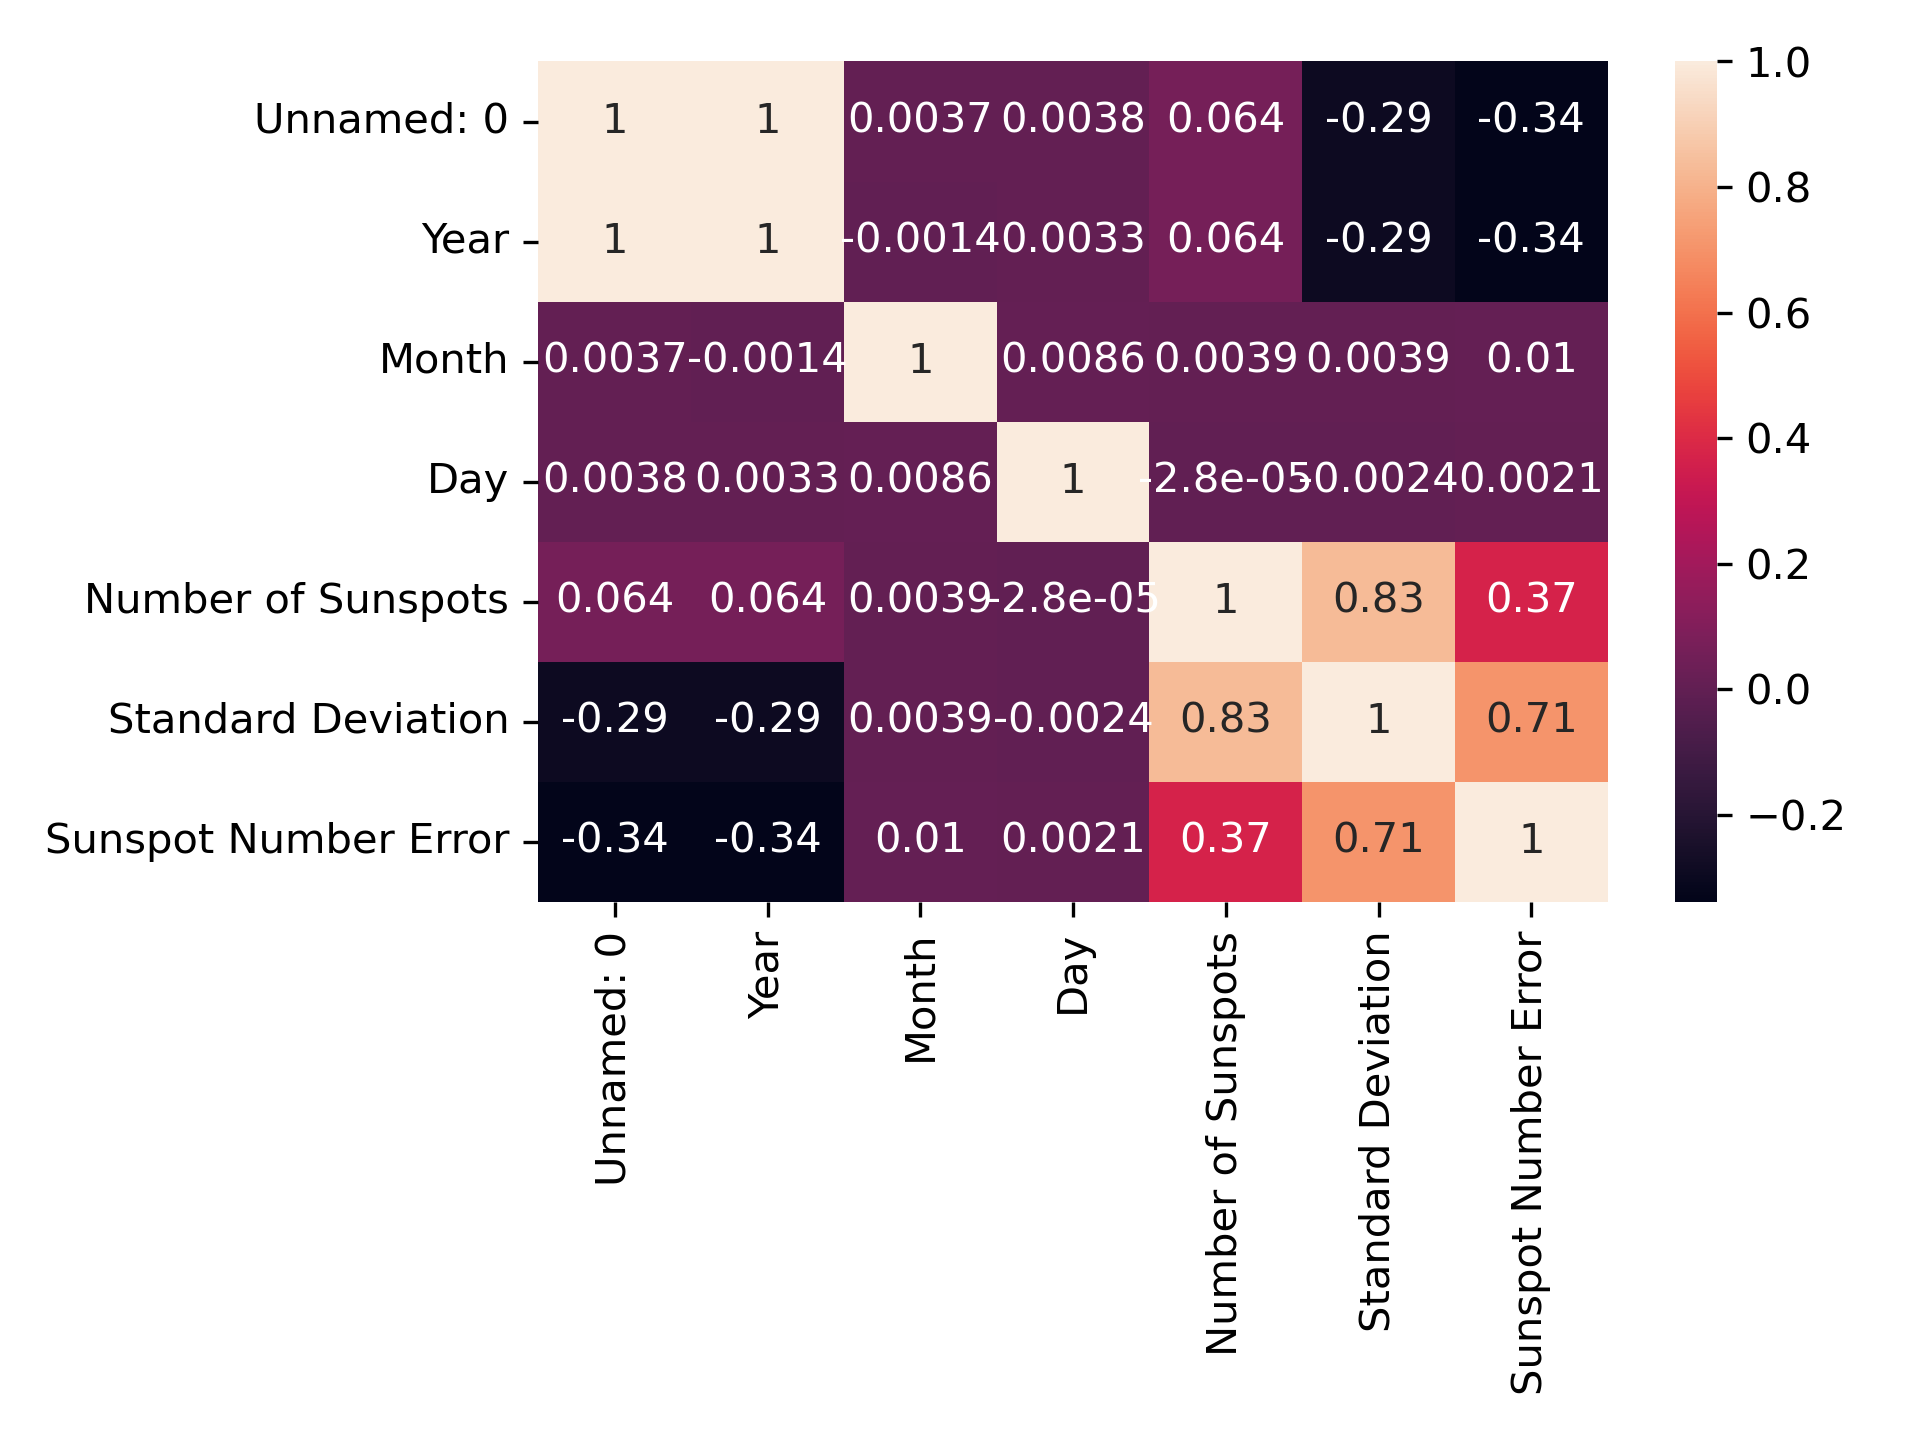

In [10]:
import seaborn as sns
fig = plt.figure()
sns.heatmap(df.corr(), annot=True)
plt.tight_layout();

# Histograming the data

<IPython.core.display.Javascript object>


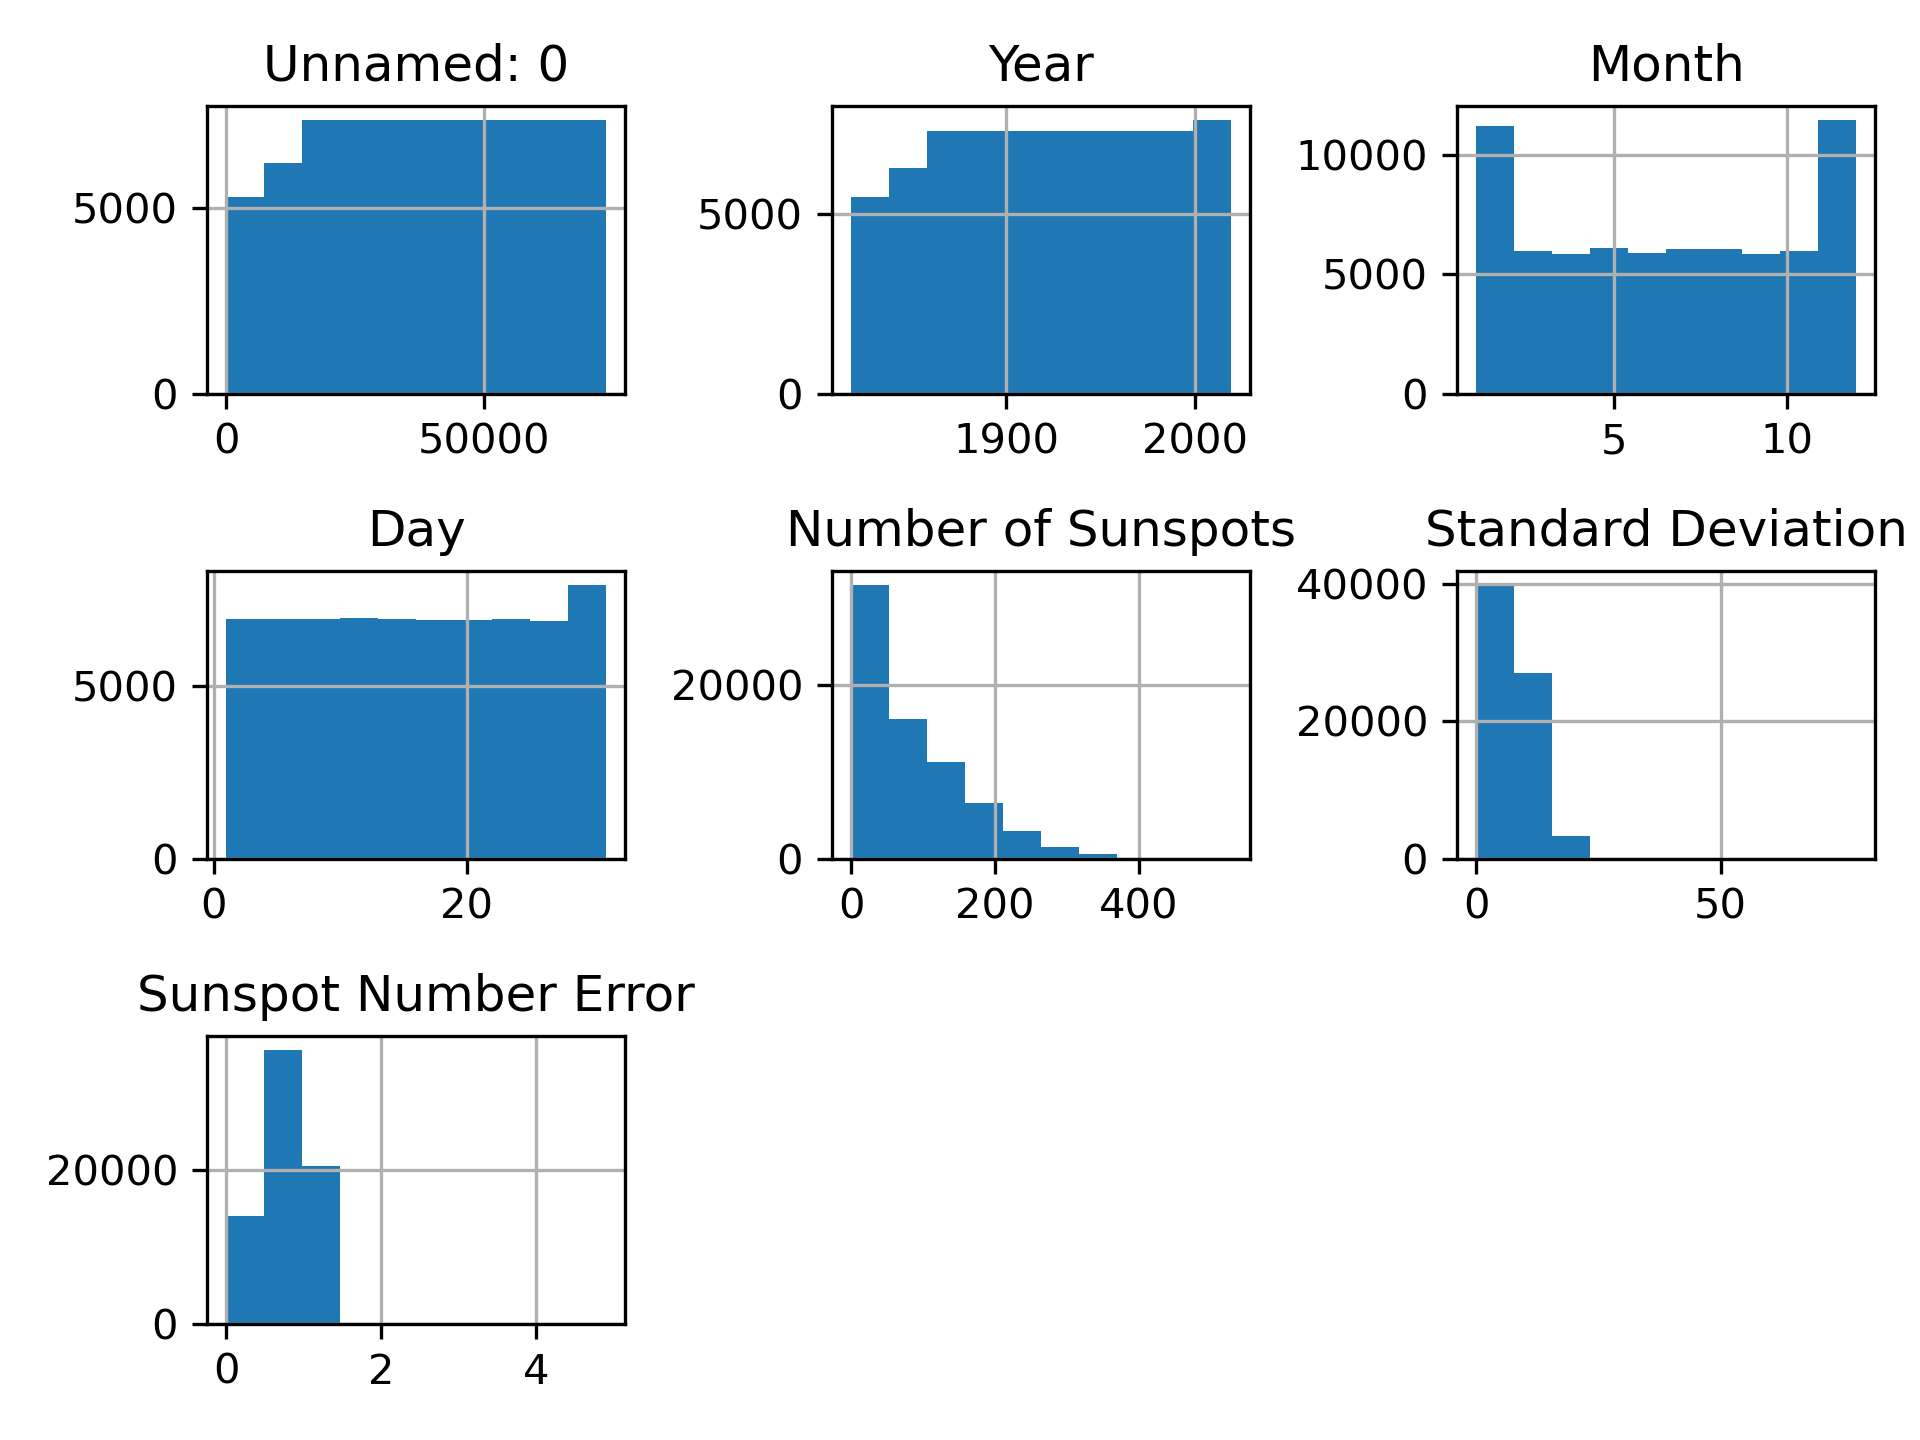

In [12]:
ax = df.hist()
plt.tight_layout();

<IPython.core.display.Javascript object>


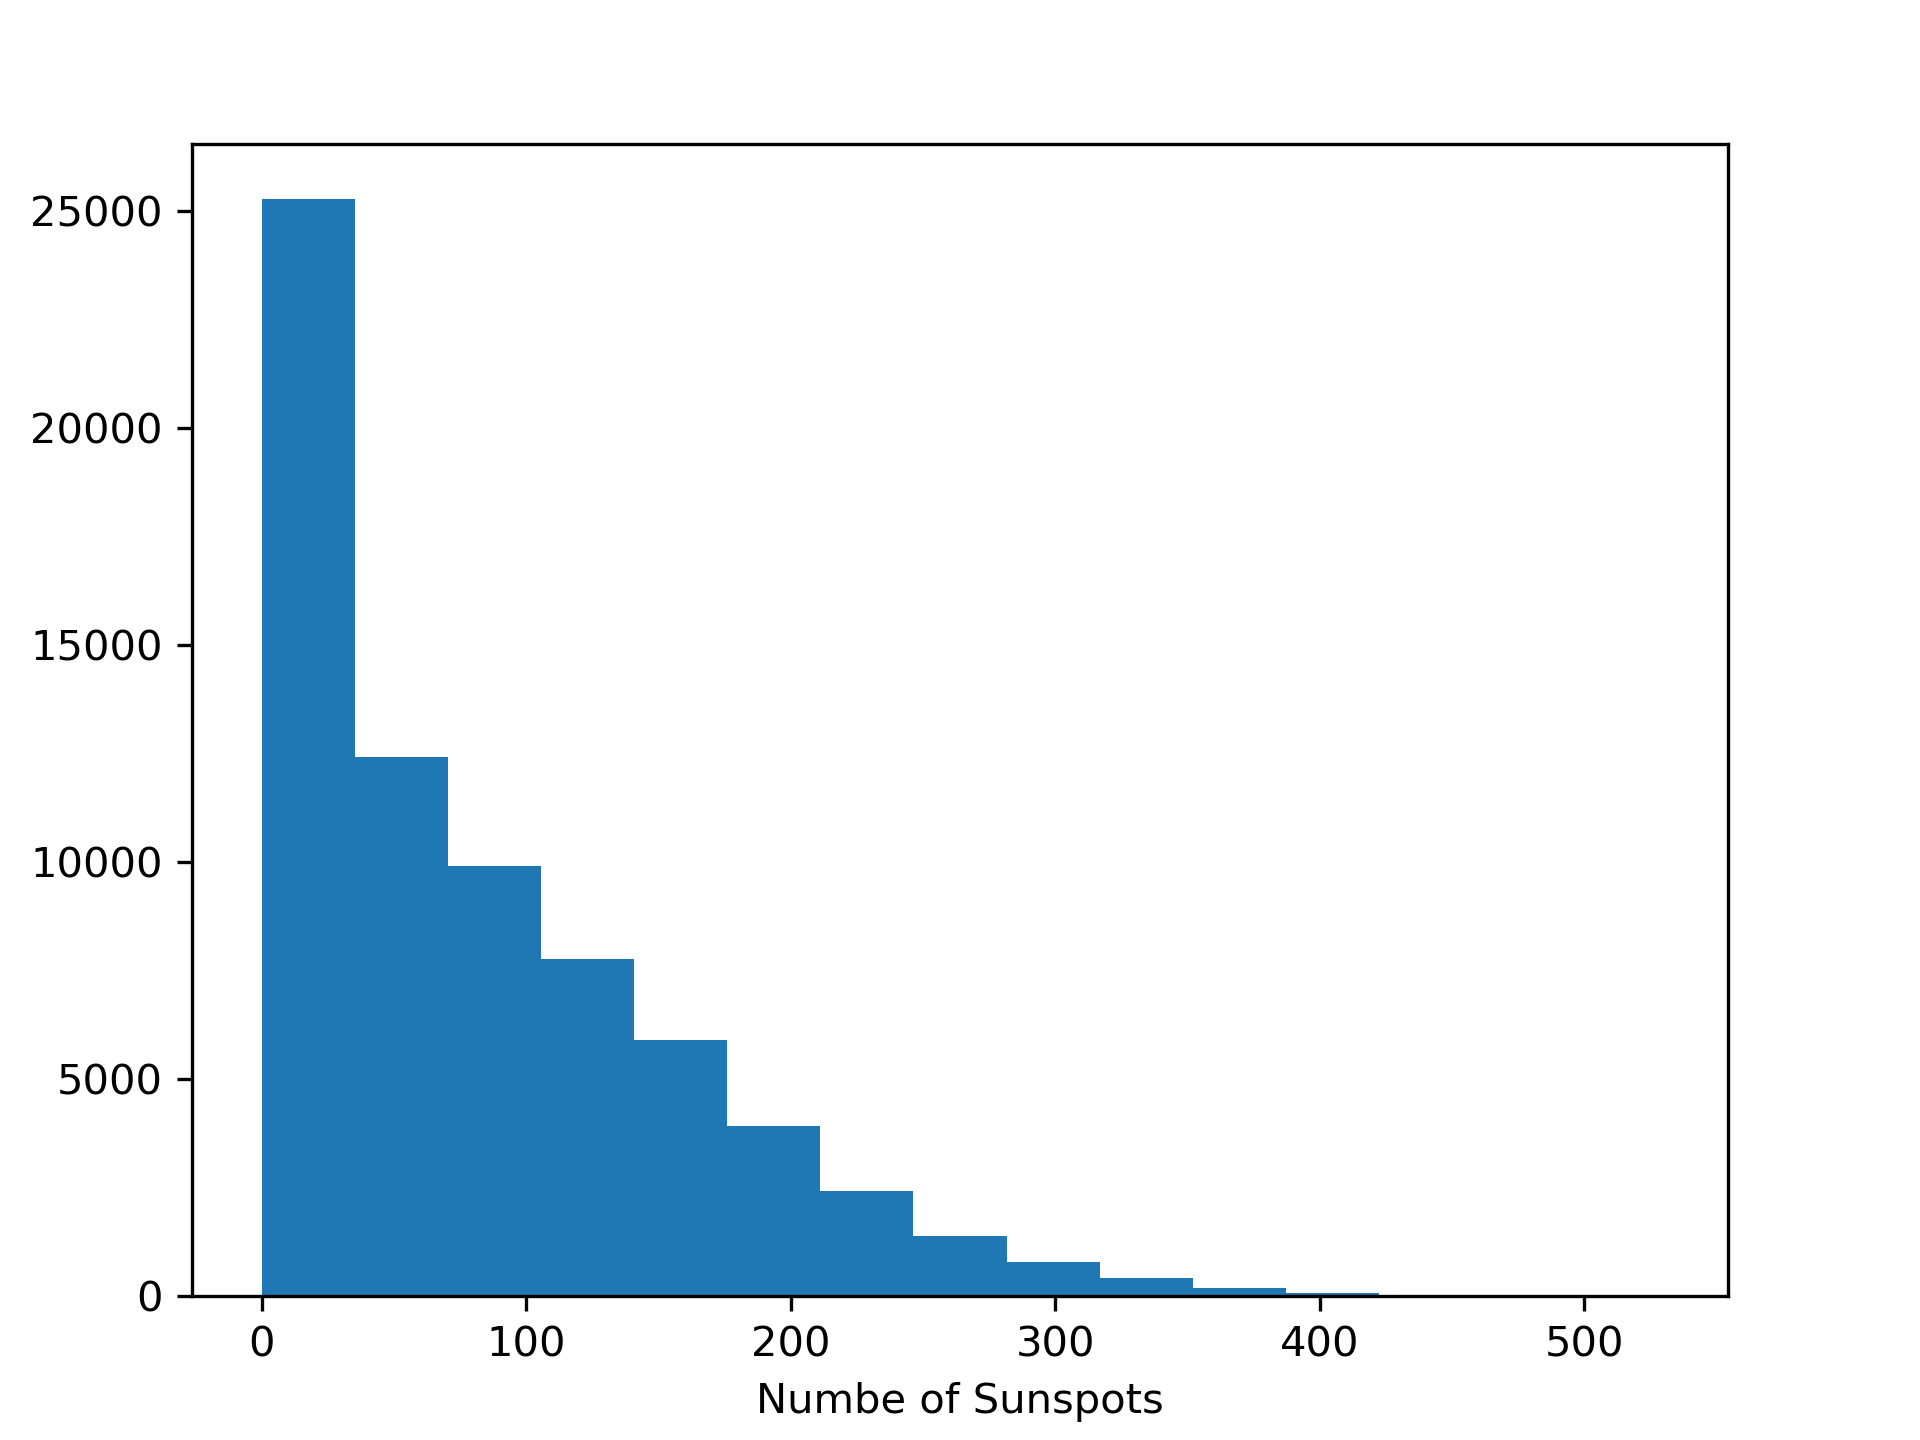

Text(0.5, 0, 'Numbe of Sunspots')

In [13]:
fig = plt.figure('Number of Sunspots')
ax = fig.add_axes([0.1,0.1,0.8,0.8])

#draw x and v
ax.hist(df['Number of Sunspots'], bins = 15)
ax.set_xlabel('Numbe of Sunspots')


In [17]:
df.reset_index(inplace=True)
df.head(5)

,index,Unnamed: 0,Year,Month,Day,Number of Sunspots,Standard Deviation,Sunspot Number Error
0,7,7,1818,1,8,65,10.2,1.265154
1,12,12,1818,1,13,37,7.7,1.265872
2,16,16,1818,1,17,77,11.1,1.264962
3,17,17,1818,1,18,98,12.6,1.272792
4,18,18,1818,1,19,105,13.0,1.268670


<IPython.core.display.Javascript object>


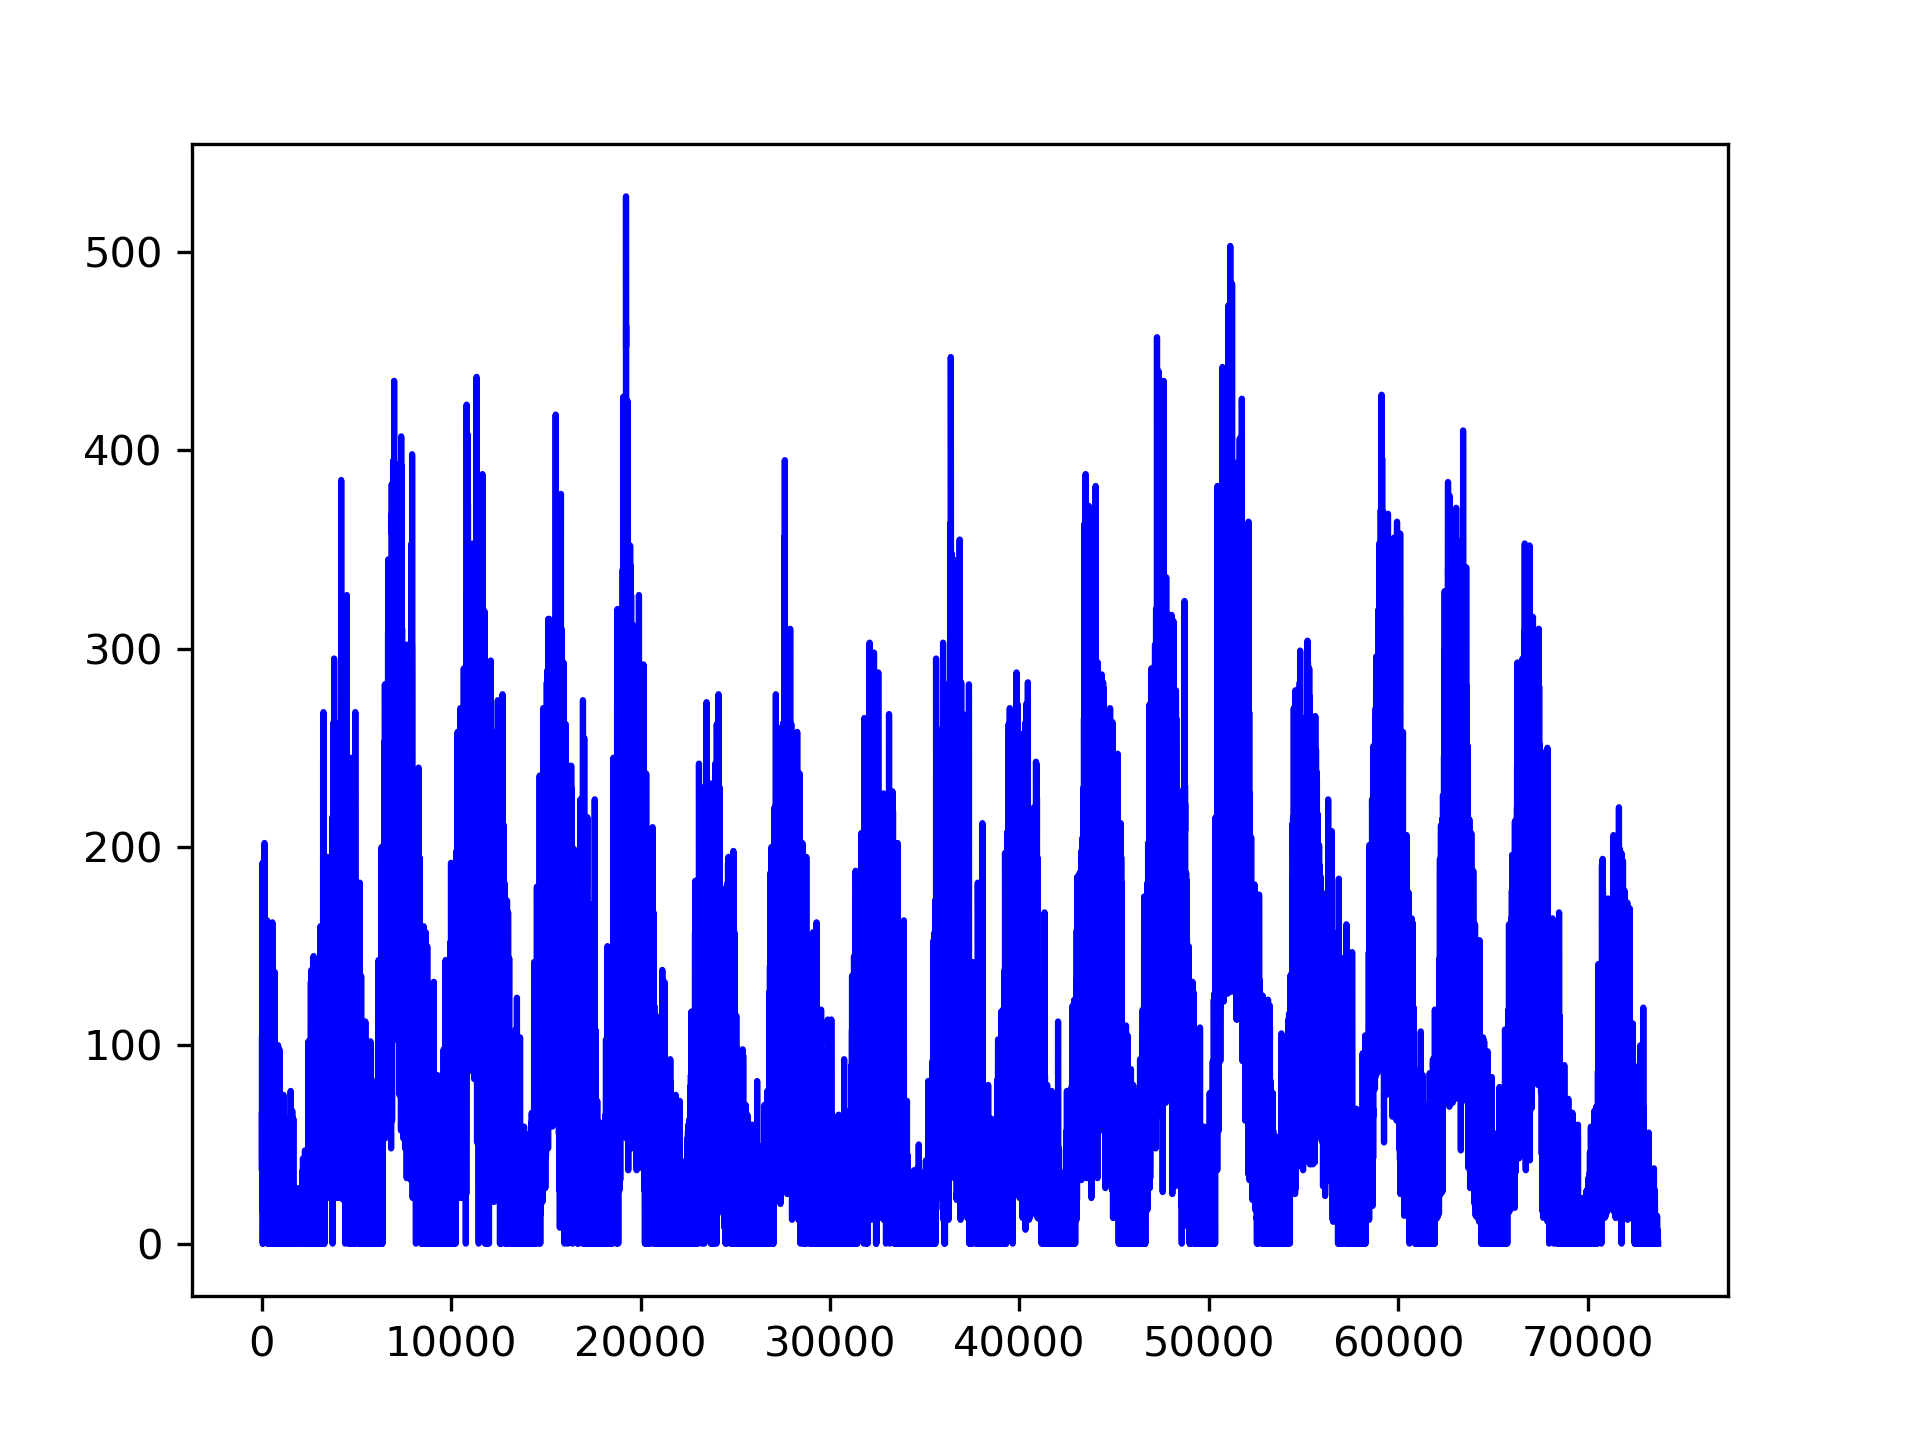

In [18]:
fig = plt.figure('Sunspots vs. Time')
ax = fig.add_axes([0.1,0.1,0.8,0.8])

#draw x and v
ax.plot(df['index'],df['Number of Sunspots'], 'b');
